#Лабораторная работа №2

Выполнил: Малько Павел М8О-309Б-22

В первую очередь загрузим необходимые для задачи библиотеки

In [5]:
!pip install catboost

In [6]:
%pip install dask[dataframe]

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
import xgboost as xgb
from catboost import CatBoostClassifier
from sklearn.preprocessing import StandardScaler

Итак, мы произвели импорт моделей LogisticRegression, DecisionTreeClassifier, GradientBoostingClassifier, SVC библиотеки sklearn и XGBClassifier, lgb.LGBMClassifier, CatBoostClassifier из соответствующих библиотек.

Из sklearn.metrics загружены метрики качества модели accuracy_score, precision_score, recall_score, f1_score а также матрица ошибок confusion_matrix.


#Реализация класса линейного классификатора

In [8]:
class LogisticRegressor:
    def __init__(self, learning_rate=0.01, iterations=1000):
        self.learning_rate = learning_rate  # Скорость обучения
        self.iterations = iterations  # Количество итераций
        self.weights = None  # Веса модели
        self.intercept = None  # Смещение

    def fit(self, features, labels):
        num_samples, num_features = features.shape
        self.weights = np.zeros(num_features)  # Начальные веса
        self.intercept = 0  # Начальное смещение

        for _ in range(self.iterations):
            # Вычисление линейной комбинации
            linear_combination = np.dot(features, self.weights) + self.intercept
            # Применение сигмоидной функции
            probabilities = self.sigmoid(linear_combination)

            # Вычисление градиентов
            dw = (1 / num_samples) * np.dot(features.T, (probabilities - labels))
            db = (1 / num_samples) * np.sum(probabilities - labels)

            # Обновление весов и смещения
            self.weights -= self.learning_rate * dw
            self.intercept -= self.learning_rate * db

    def predict(self, features):
        linear_combination = np.dot(features, self.weights) + self.intercept
        probabilities = self.sigmoid(linear_combination)
        predicted_classes = [1 if prob >= 0.5 else 0 for prob in probabilities]
        return np.array(predicted_classes)

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

#Применение готовых решений и сравнение

Загрузим и подготовим данные для обработки

In [9]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')


df_train = df_train.dropna().drop_duplicates()
df_test = df_test.dropna().drop_duplicates()

df_train = pd.get_dummies(df_train)
df_test = pd.get_dummies(df_test)

Разделим данные на тренировочную и тестовую выборки

In [10]:
X = df_train.drop('LoanApproved', axis=1)
y = df_train['LoanApproved']

# Нормализация данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#Confusion matrix и метрики


In [28]:
def get_metrics(y_true, y_pred):
    print(f"accuracy: {accuracy_score(y_true, y_pred)}, precision: {precision_score(y_true, y_pred)}, recall: {recall_score(y_true, y_pred)}, f1: {f1_score(y_true, y_pred)}")
    return

def draw_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="GnBu", xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

#Logistic regression(custom)

In [12]:
log_reg_custom = LogisticRegressor(learning_rate=0.01, iterations=1000)
log_reg_custom.fit(X_train, y_train)
y_pred_log_reg_custom = log_reg_custom.predict(X_val)

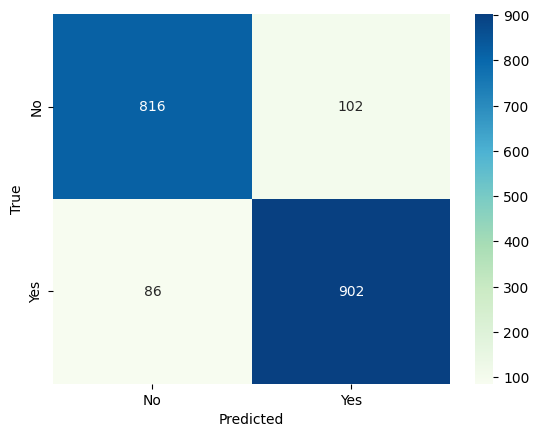

accuracy: 0.9013641133263379, precision: 0.898406374501992, recall: 0.9129554655870445, f1: 0.9056224899598394


In [29]:
draw_confusion_matrix(y_val, y_pred_log_reg_custom)
get_metrics(y_val, y_pred_log_reg_custom)

#Logistic regression (sklearn)

In [14]:
log_reg_sklearn = LogisticRegression(max_iter=1000)
log_reg_sklearn.fit(X_train, y_train)
y_pred_log_reg_sklearn = log_reg_sklearn.predict(X_val)

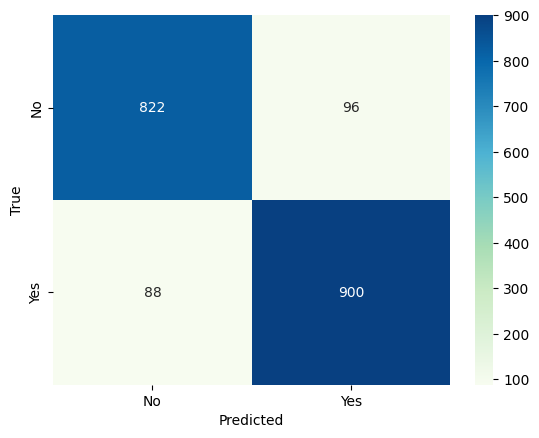

accuracy: 0.9034627492130115, precision: 0.9036144578313253, recall: 0.9109311740890689, f1: 0.907258064516129


In [30]:
draw_confusion_matrix(y_val, y_pred_log_reg_sklearn)
get_metrics(y_val, y_pred_log_reg_sklearn)

#Gradient boosting (sklearn)

In [16]:
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_val)

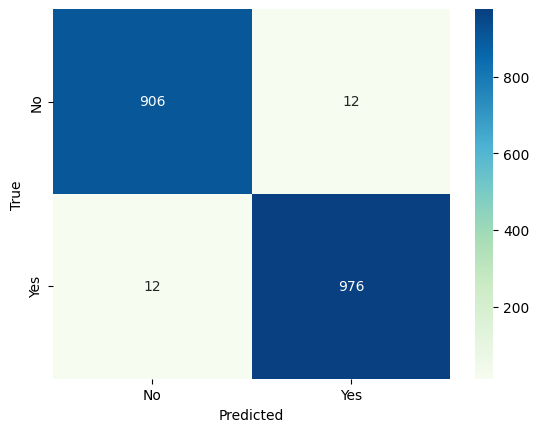

accuracy: 0.9874081846799581, precision: 0.9878542510121457, recall: 0.9878542510121457, f1: 0.9878542510121457


In [32]:
draw_confusion_matrix(y_val, y_pred_gb)
get_metrics(y_val, y_pred_gb)

#LightGBM

In [18]:
lgbm_model = LGBMClassifier(random_state=42)
lgbm_model.fit(X_train, y_train)
y_pred_lgbm = lgbm_model.predict(X_val)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 3903, number of negative: 3720
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003143 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4878
[LightGBM] [Info] Number of data points in the train set: 7623, number of used features: 50
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.512003 -> initscore=0.048022
[LightGBM] [Info] Start training from score 0.048022


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


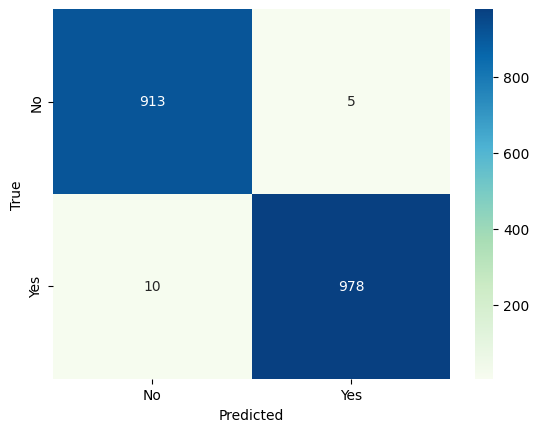

accuracy: 0.9921301154249738, precision: 0.9949135300101729, recall: 0.9898785425101214, f1: 0.9923896499238964


In [33]:
draw_confusion_matrix(y_val, y_pred_lgbm)
get_metrics(y_val, y_pred_lgbm)

#XGBoost

In [20]:
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_val)

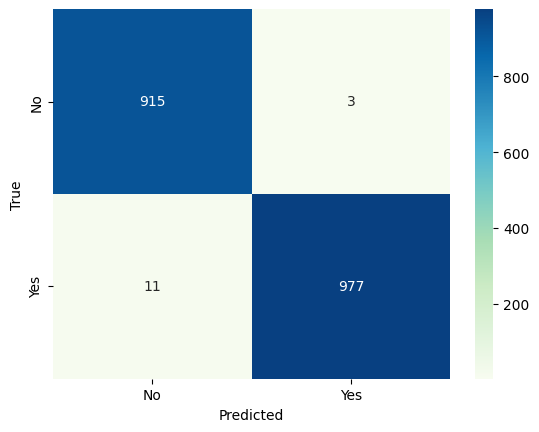

accuracy: 0.9926547743966422, precision: 0.996938775510204, recall: 0.9888663967611336, f1: 0.9928861788617886


In [34]:
draw_confusion_matrix(y_val, y_pred_xgb)
get_metrics(y_val, y_pred_xgb)

#CatBoost

In [22]:
catboost_model = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=6, random_seed=42, verbose=0)
catboost_model.fit(X_train, y_train)
y_pred_catboost = catboost_model.predict(X_val)

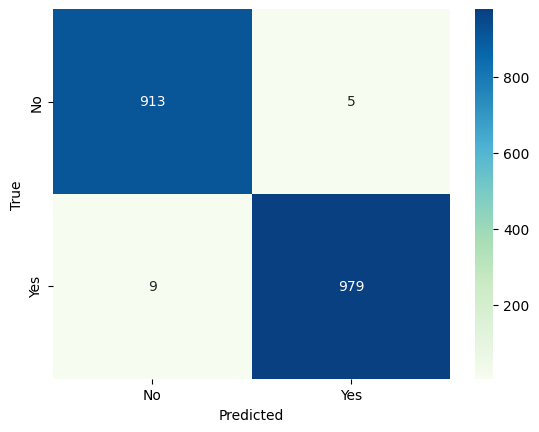

accuracy: 0.9926547743966422, precision: 0.9949186991869918, recall: 0.9908906882591093, f1: 0.9929006085192698


In [35]:
draw_confusion_matrix(y_val, y_pred_catboost)
get_metrics(y_val, y_pred_catboost)

#Support Vector Machine (SVM)

In [24]:
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_val)

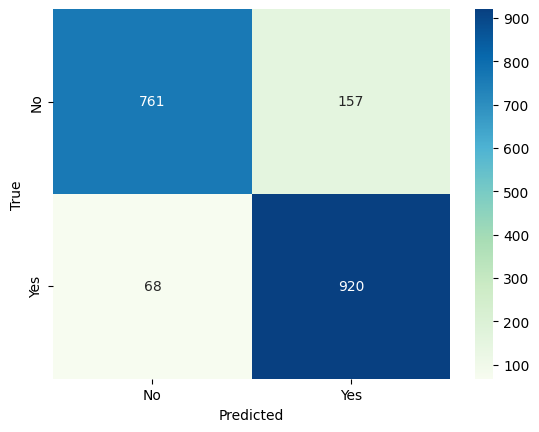

accuracy: 0.8819517313746065, precision: 0.8542246982358404, recall: 0.9311740890688259, f1: 0.8910411622276029


In [36]:
draw_confusion_matrix(y_val, y_pred_svm)
get_metrics(y_val, y_pred_svm)

#Decision tree

In [38]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_val)

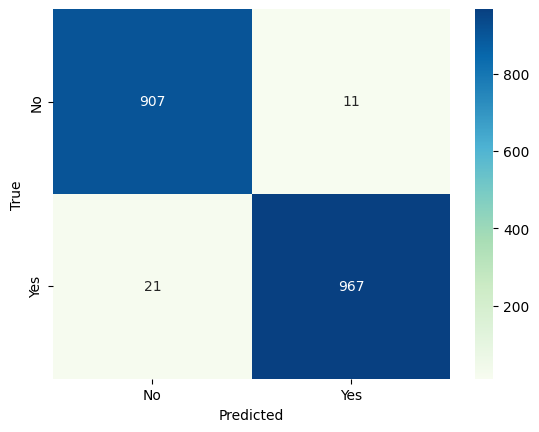

accuracy: 0.9832109129066107, precision: 0.9887525562372188, recall: 0.978744939271255, f1: 0.9837232960325534


In [39]:
draw_confusion_matrix(y_val, y_pred_dt)
get_metrics(y_val, y_pred_dt)

#Random forest

In [40]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_val)

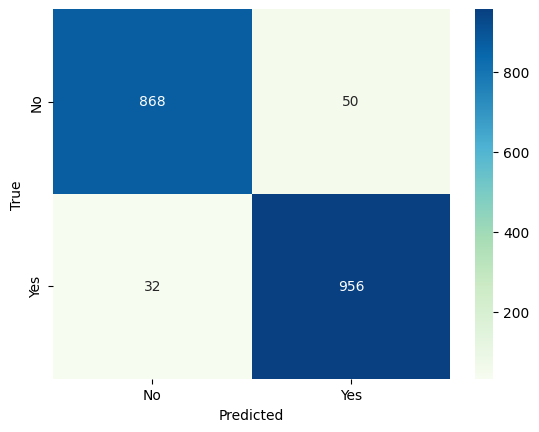

accuracy: 0.9569779643231899, precision: 0.9502982107355865, recall: 0.9676113360323887, f1: 0.958876629889669


In [41]:
draw_confusion_matrix(y_val, y_pred_rf)
get_metrics(y_val, y_pred_rf)

#Naive Bayes

In [42]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_val)

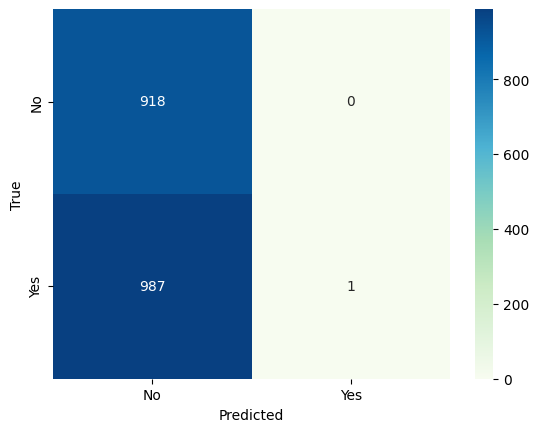

accuracy: 0.4821615949632739, precision: 1.0, recall: 0.0010121457489878543, f1: 0.0020222446916076846


In [43]:
draw_confusion_matrix(y_val, y_pred_nb)
get_metrics(y_val, y_pred_nb)

#K-nearest neighbors

In [44]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_val)

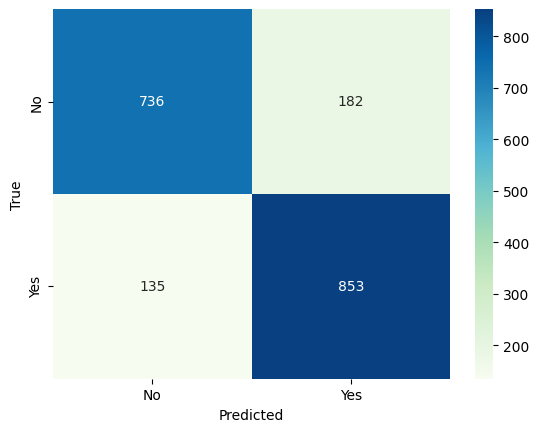

accuracy: 0.8336831059811123, precision: 0.8241545893719807, recall: 0.8633603238866396, f1: 0.8433020266930301


In [45]:
draw_confusion_matrix(y_val, y_pred_knn)
get_metrics(y_val, y_pred_knn)

#Выводы

Все протестированные модели показали достойные результаты.
Логистическая регрессия показала около 90% по точности, однако её возможности ограничены в условиях нелинейных зависимостей.

Особенно выделяются модели градиентного бустинга, такие как LightGBM, XGBoost и CatBoost, проявившие высокую эффективность с точностью выше 99%. Эти алгоритмы не только обладают отличной скоростью и точностью, но и способны лучше справляться со сложными зависимостями в данных.

Модели, такие как SVM и Naive Bayes, продемонстрировали менее убедительные результаты, особенно Naive Bayes с точностью ниже 50%, что связано с сильными корреляциями в данных. F1-меры XGBoost и LightGBM подтверждают хороший баланс между точностью и полнотой, а ключевой метрикой в задаче стал Recall, поскольку ошибки с ложными отклонениями могут иметь серьезные последствия.

Наконец, предобработка данных, включая нормализацию и работу с категориальными переменными, значительно улучшила качество моделей.